### Load The Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import textstat
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy


KeyboardInterrupt: 

In [3]:
df=pd.read_csv('ecommerceDataset.csv', names = ['label', 'description'])

### EDA

In [4]:
df.head()

,label,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
df.describe()

,label,description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [6]:
df.shape

(50425, 2)

In [7]:
df.isnull().sum()

label          0
description    1
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,label,description
39330,Clothing & Accessories,NaN


In [9]:
df=df.dropna()

In [10]:
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

So i will be renaming the `Clothing & Accessories` label because of the `&` special char.

In [11]:
df['label'] = df['label'].replace('Clothing & Accessories', 'Clothing_Accessories')

In [12]:
df['label'].value_counts()

label
Household               19313
Books                   11820
Electronics             10621
Clothing_Accessories     8670
Name: count, dtype: int64

C:\Users\gokal\AppData\Local\Temp\ipykernel_43240\3507136884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'],palette='mako')


<Axes: xlabel='label', ylabel='count'>

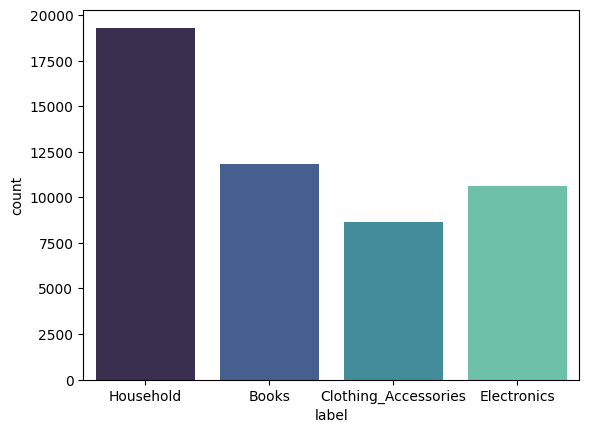

In [13]:
sns.countplot(x=df['label'],palette='mako')

### Indermediate Data Analysis

Here, i will be getting help from an article named "Intermediate Data Analysis Techniques for Text Data"

In [14]:
nlp = spacy.load("en_core_web_sm")


Text(0.5, 1.0, 'Word Counts')

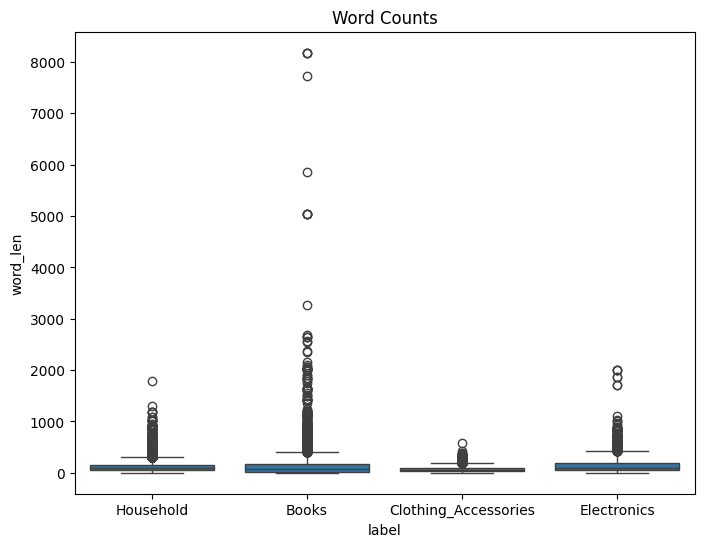

In [15]:
df['char_len'] = df['description'].apply(len)
df['word_len'] = df['description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_len', data=df)
plt.title('Word Counts')


Text(0.5, 1.0, 'Char Counts')

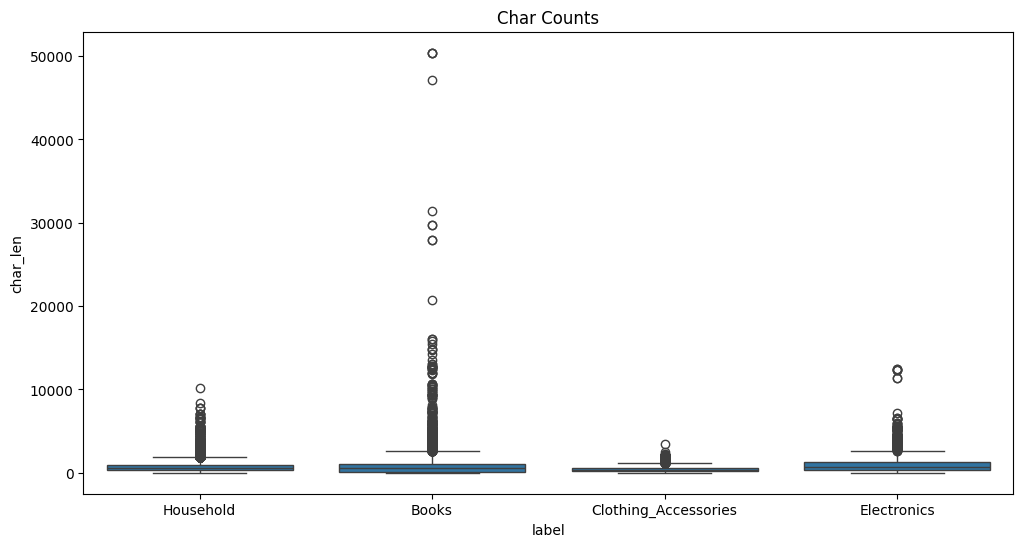

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='char_len', data=df)
plt.title('Char Counts')

In [17]:
df.head()

,label,description,char_len,word_len
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,1338,228
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",346,59
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,1316,224
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",1091,184
4,Household,Incredible Gifts India Wooden Happy Birthday U...,989,184


In here, I created a matrices with TfidfVectorizer which includes descriptions and words. 
Also feature_names variable is holding all of the words.

In [18]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['description'])
feature_names = tfidf.get_feature_names_out()

In [1]:
df = df.reset_index(drop=True)

NameError: name 'df' is not defined

In [20]:
def top_tfidf_words_per_label(label):
    idx = df[df['label'] == label].index
    avg_tfidf = X_tfidf[idx].mean(axis=0).A1
    top_n = np.argsort(avg_tfidf)[-10:][::-1]
    return [feature_names[i] for i in top_n]

In [21]:
for label in df['label'].unique():
    print(f"{label}: {top_tfidf_words_per_label(label)}")

Household: ['set', 'steel', 'home', 'stainless', 'easy', 'use', 'table', 'color', 'kitchen', 'water']
Books: ['book', 'author', 'books', 'review', 'world', 'new', 'university', 'india', 'students', 'life']
Clothing_Accessories: ['cotton', 'women', 'men', 'wear', 'fit', 'girls', 'fabric', 'shirt', 'boys', 'look']
Electronics: ['usb', 'black', 'camera', 'bluetooth', 'cable', 'wireless', 'audio', 'power', 'card', 'speaker']


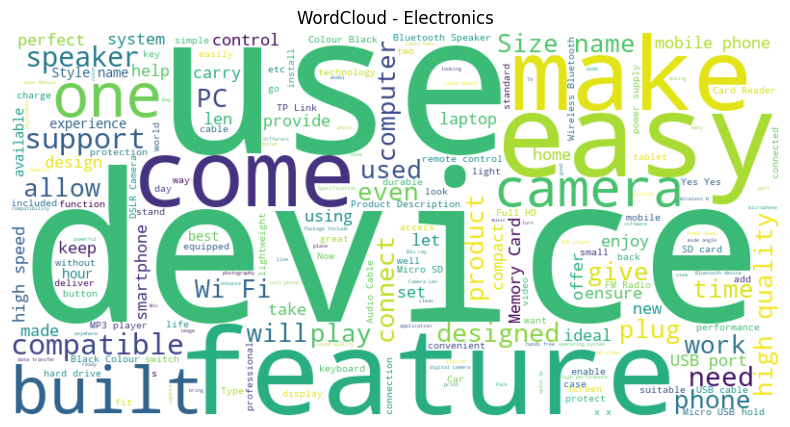

In [22]:
text = ' '.join(df[df['label'] == 'Electronics']['description'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.title(f'WordCloud - {label}')
plt.axis('off')
plt.show()

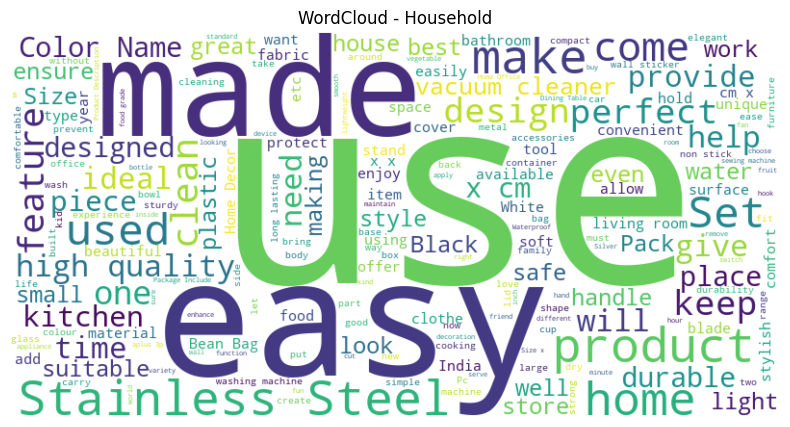

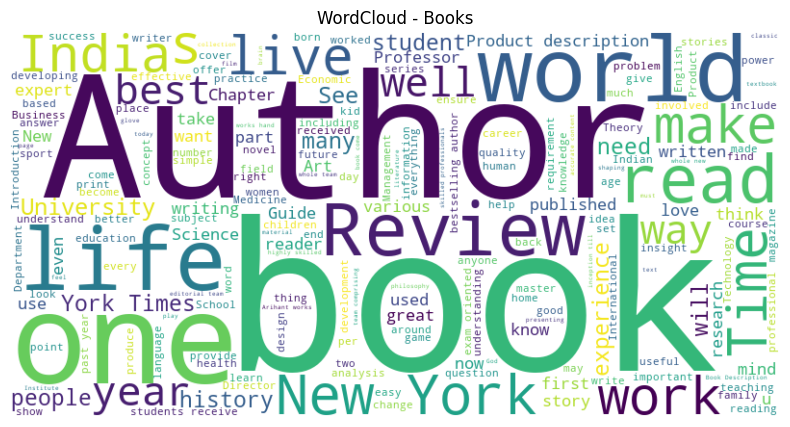

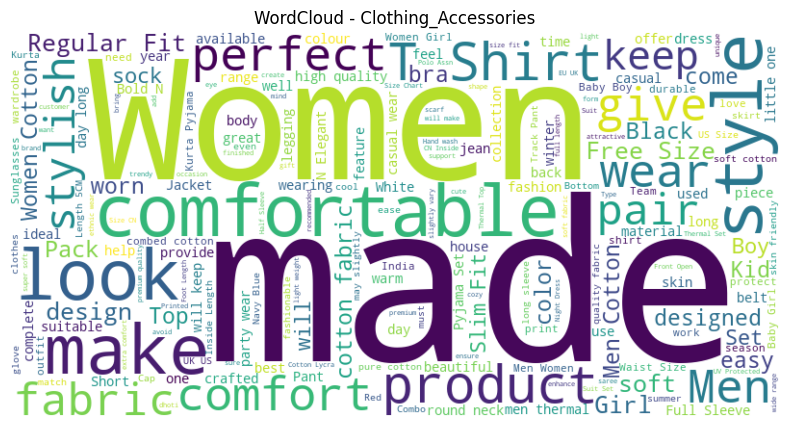

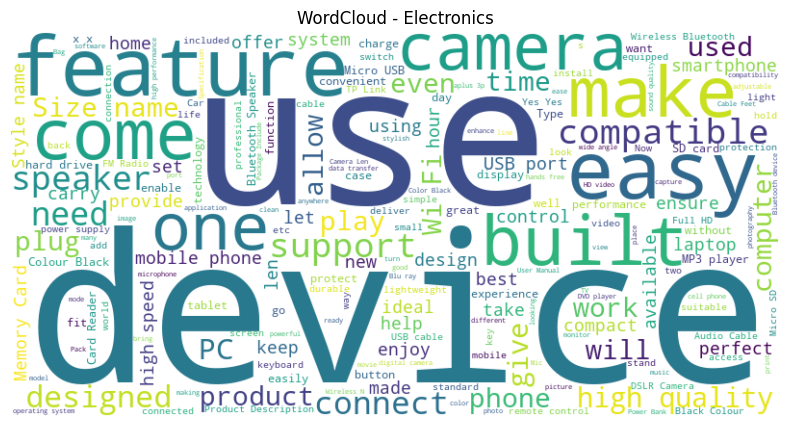

In [23]:
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['description'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud - {label}')
    plt.axis('off')
    plt.show()